BANKING AND MARKETING DATA

In [1]:
#importing the libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#reading the data
df1 = pd.read_csv(r"C:\Users\Msc 1\Desktop\Sairaj\data_visualisation\Banking_Marketing\Data1.csv")
df1.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

In [3]:
df1.shape#checking the nuber of rows and columns

(5000, 8)

In [4]:
df1.columns #getting the names of the columns

Index(['ID', 'Age', 'CustomerSince', 'HighestSpend', 'ZipCode', 'HiddenScore',
       'MonthlyAverageSpend', 'Level'],
      dtype='object')

In [5]:
#reading the Data from the local system
df2=pd.read_csv(r"C:\Users\Msc 1\Desktop\Sairaj\data_visualisation\Banking_Marketing\Data2.csv")
df2.head()

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [6]:
# checking the dtypes of the features of the first data frame
df1.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
dtype: object

In [7]:
#to see the no of rows and cols of the data frame
df2.shape

(5000, 7)

In [8]:
#to see the names of the columns
df2.columns

Index(['ID', 'Mortgage', 'Security', 'FixedDepositAccount', 'InternetBanking',
       'CreditCard', 'LoanOnCard'],
      dtype='object')

In [9]:
# checking the dtypes of the features
df2.dtypes

ID                       int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [10]:
#merging the two dataframes
merged_df = pd.merge(df1, df2, on='ID', how='inner')
merged_df.head()

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
0                  1.6      1         0         1                    0   
1                  1.5      1         0         1                    0   
2                  1.0      1         0         0                    0   
3                  2.7      2         0         0                    0   
4                  1.0      2         0         0                    0   

   InternetBanking  CreditCard  LoanOnCard  
0                0           0         NaN  
1                0           0         NaN  
2                0           0         NaN  
3                0           0         NaN  
4                0           1         NaN

In [11]:
#checking the shape  of the new dataframe
merged_df.shape

(5000, 14)

In [12]:
# name of all the columns to be changed
cols_to_change =['CreditCard','InternetBanking','FixedDepositAccount','Security','Level','HiddenScore']

In [13]:
#changeing the data types of the features
for items in cols_to_change:
    merged_df[items] = merged_df[items].astype(object)
merged_df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 585.9+ KB


<Axes: xlabel='LoanOnCard', ylabel='Count'>

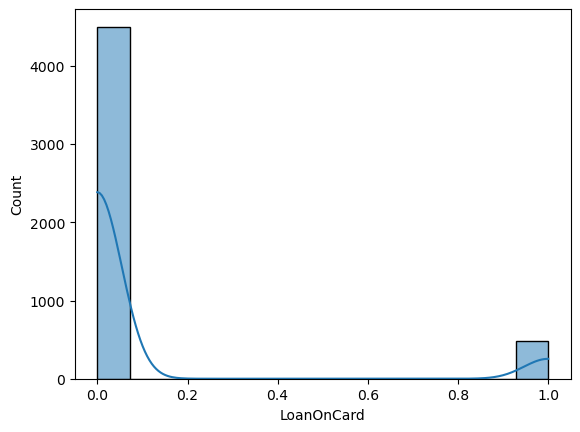

In [14]:
# ploting a histplot bet loan on card and count.Histplot will be giving better readability to the data.
sns.histplot(data=merged_df,x='LoanOnCard',kde=True)#it follows Binomial DIstribution.

In [15]:
# To see the  nos of 0s and 1s 
merged_df['LoanOnCard'].value_counts() 

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

In [16]:
#finding the null values in all the rows
merged_df.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

In [17]:
#percentage of null values of LoanOnCard
null_count = merged_df['LoanOnCard'].isnull().sum()
total_count = len(merged_df)
percentage_null = (null_count / total_count) * 100
print("{} percentage of null values are there in LoanOnCard".format(percentage_null))

0.4 percentage of null values are there in LoanOnCard


In [18]:
#percentage of null Values in entire dataframe
null_count = merged_df.isnull().sum().sum()
total_count = merged_df.size
percentage_null = (null_count / total_count) * 100
round_percentage=round(percentage_null,2) 
print("{} percentage of null values in the dataframe".format(round_percentage))

0.03 percentage of null values in the dataframe


In [19]:
#get the col: loan on card
merged_df["LoanOnCard"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: LoanOnCard, Length: 5000, dtype: float64

In [20]:
#to find the mode of the particular column
mode_val = merged_df['LoanOnCard'].mode()[0]
mode_val
# type(mode_val)


0.0

In [21]:
#fill null values 
merged_df["LoanOnCard"].fillna(mode_val, inplace = True)
merged_df["LoanOnCard"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
4995    0.0
4996    0.0
4997    0.0
4998    0.0
4999    0.0
Name: LoanOnCard, Length: 5000, dtype: float64

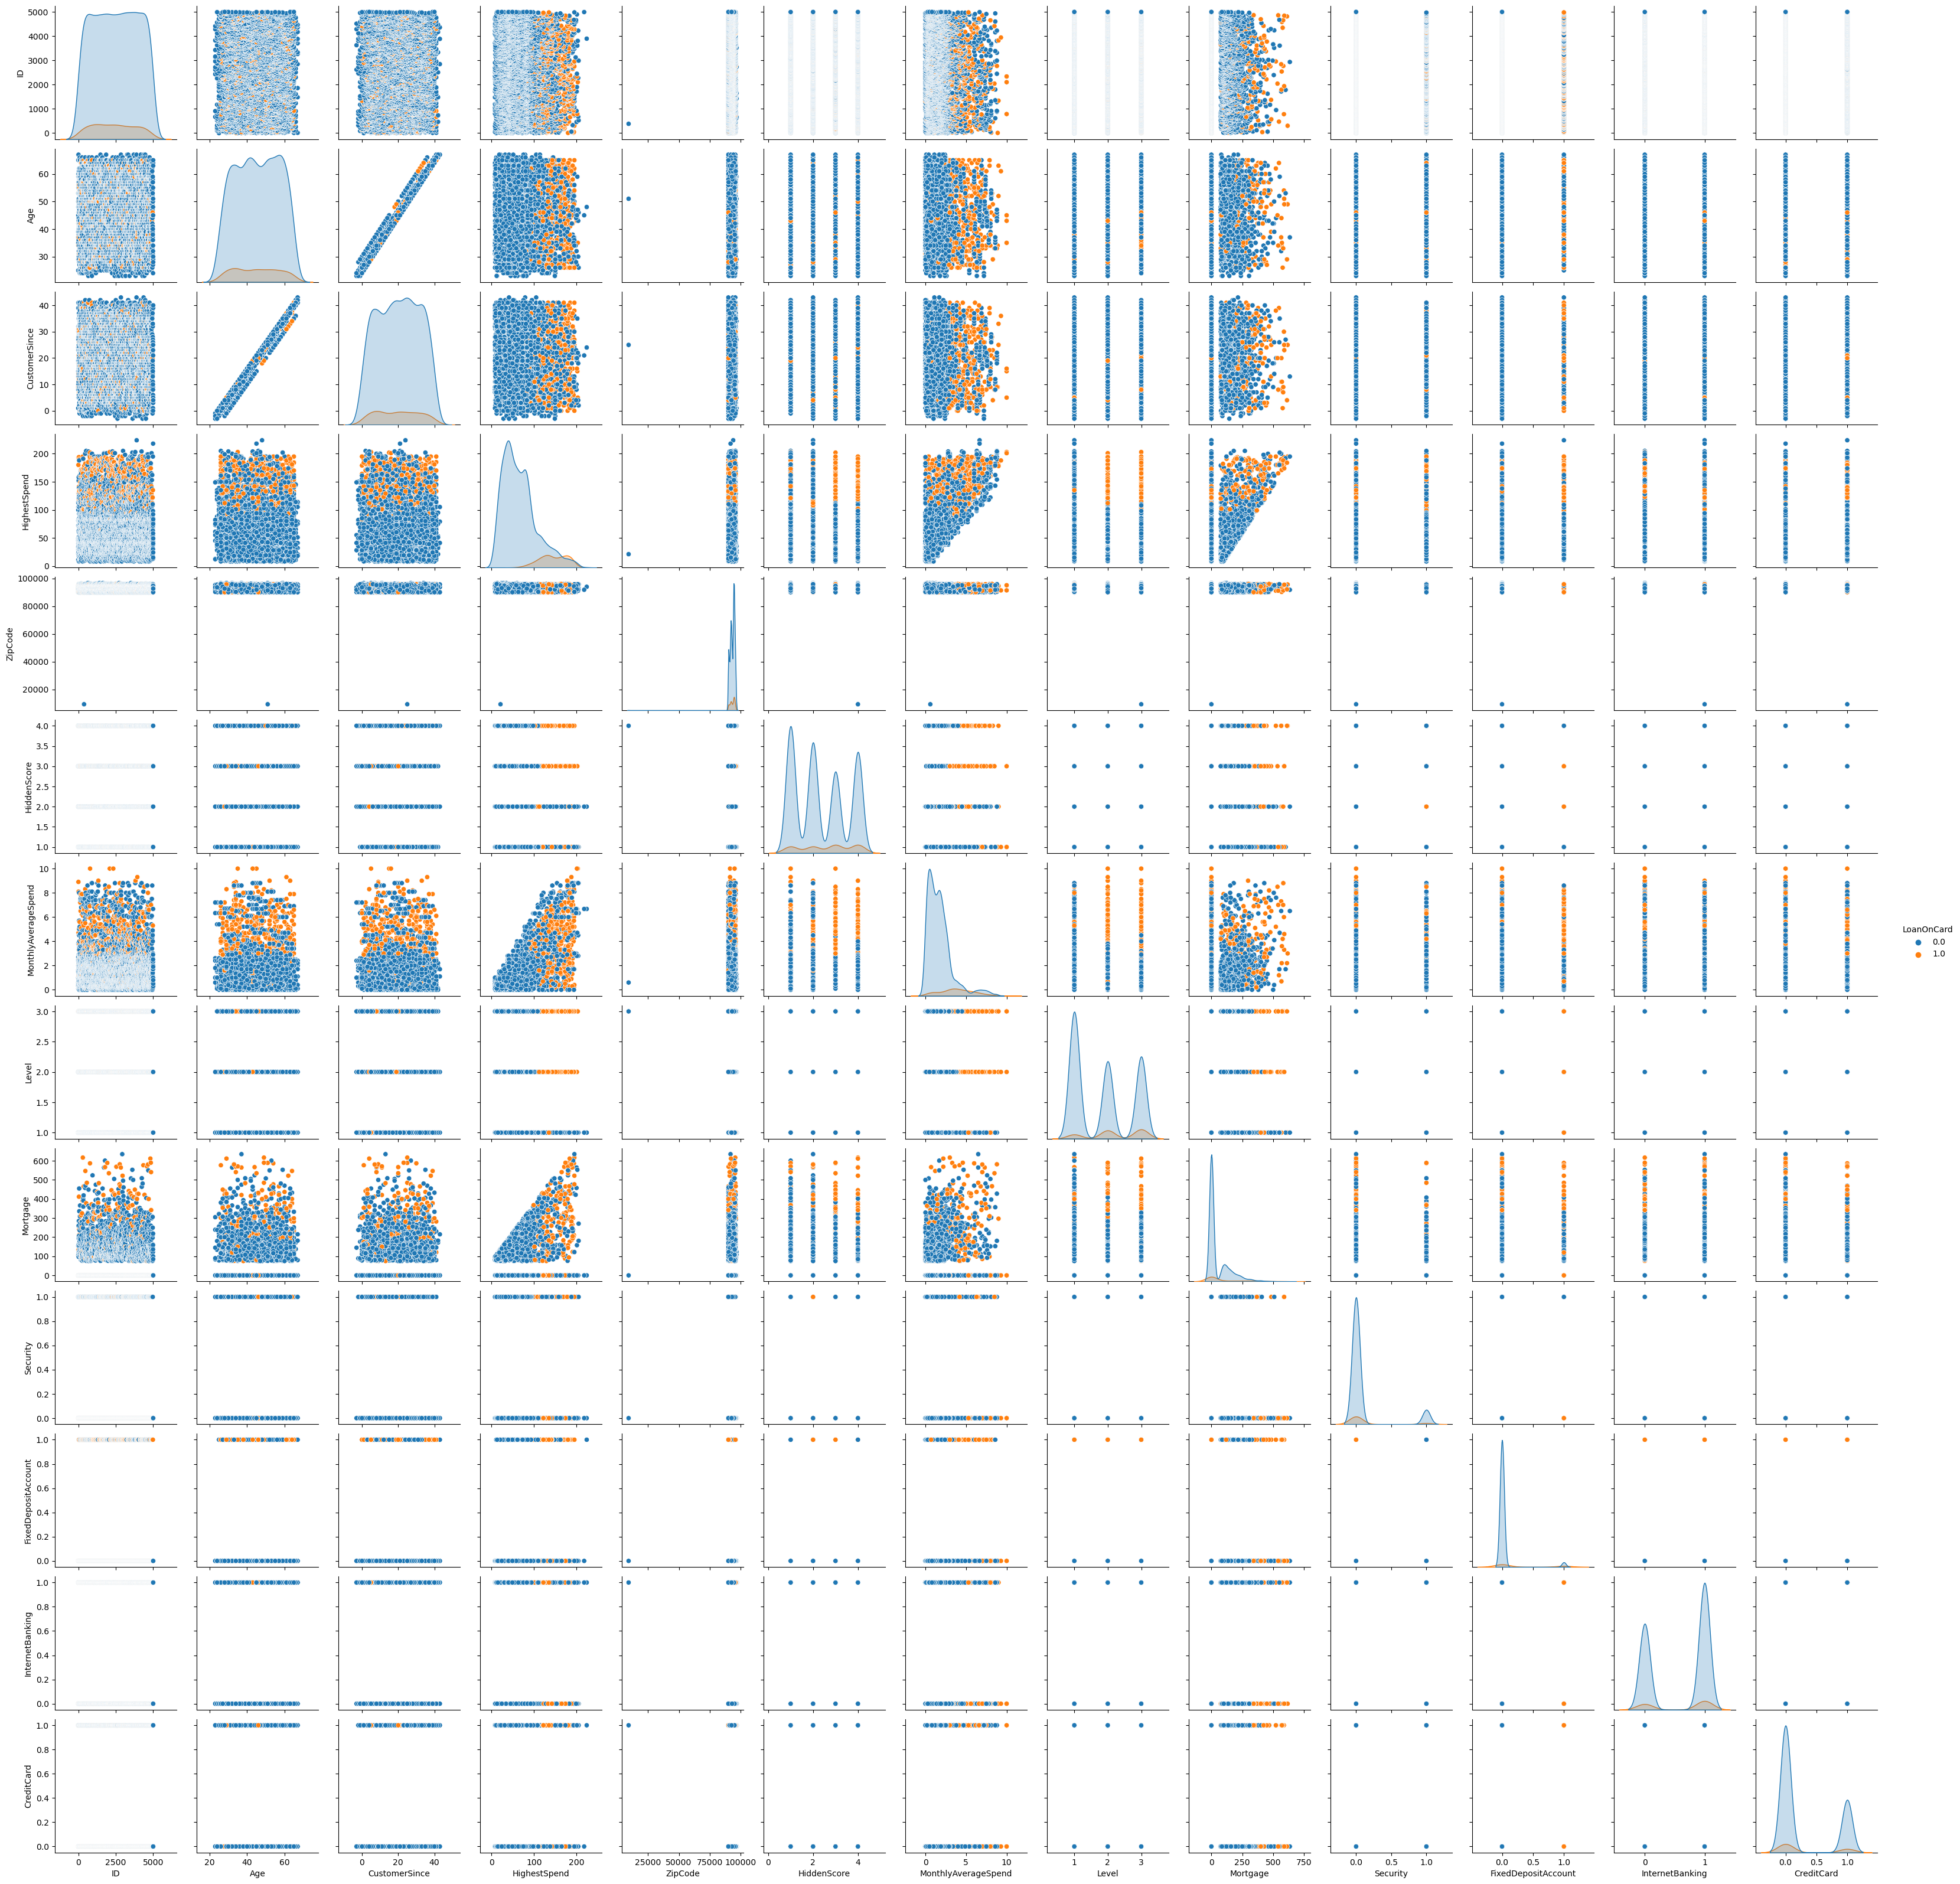

In [22]:
#plotting pairplot to see the relation between the features
sns.pairplot(merged_df, hue ='LoanOnCard')

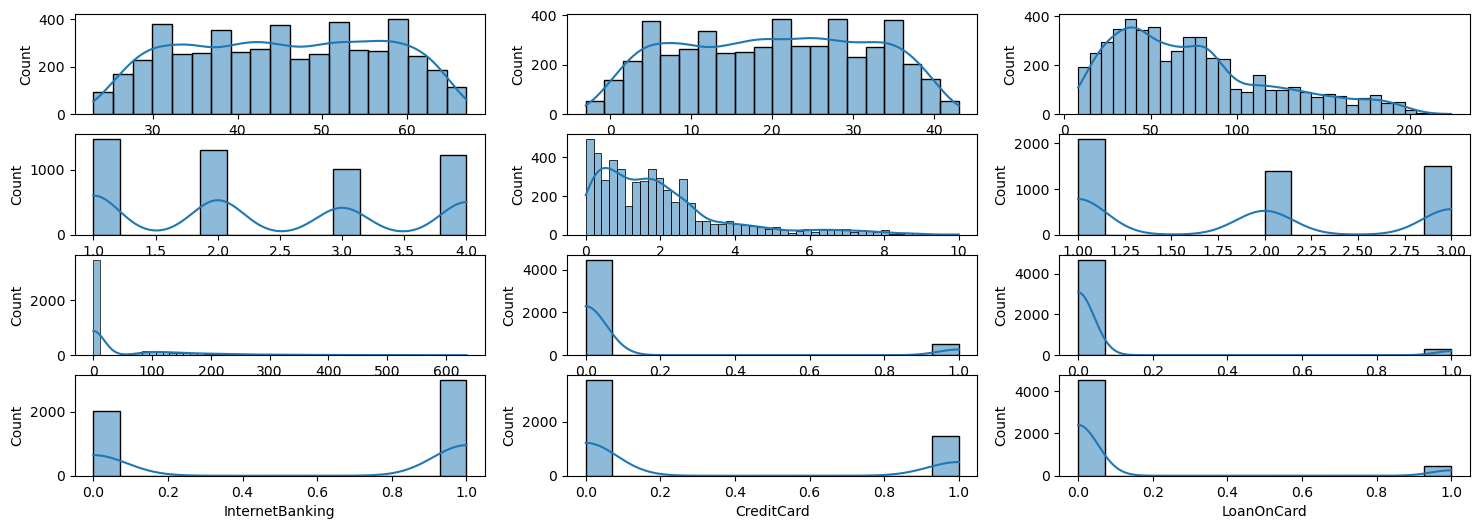

In [27]:
i=1# Set the initial value of i to 1
plt.figure(figsize=(18, 6))# Create a figure with a specified size
for feature in merged_df:# Loop through the columns of the DataFrame 'merged_df'
    if feature=='ID' or feature=='ZipCode':# Skip columns with the names 'ID' or 'ZipCode'
        continue
    else: 
        plt.subplot(4,3,i) # Create a subplot
        sns.histplot(data=merged_df, x=feature, kde=True)# Create a histogram (histplot) for the current feature with a kernel density estimate
        i+=1# Increment i to move to the next subplot

In [28]:
merged_df.corr()# Calculate the correlation matrix

C:\Users\Msc 1\AppData\Local\Temp\ipykernel_9160\4191659586.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  merged_df.corr()


ID       Age  CustomerSince  HighestSpend  \
ID                   1.000000 -0.008473      -0.008326     -0.017695   
Age                 -0.008473  1.000000       0.994215     -0.055269   
CustomerSince       -0.008326  0.994215       1.000000     -0.046574   
HighestSpend        -0.017695 -0.055269      -0.046574      1.000000   
ZipCode              0.013432 -0.029216      -0.028626     -0.016410   
MonthlyAverageSpend -0.024675 -0.052012      -0.050077      0.645984   
Mortgage            -0.013920 -0.012539      -0.010582      0.206806   
LoanOnCard          -0.024801 -0.007726      -0.007413      0.502462   

                      ZipCode  MonthlyAverageSpend  Mortgage  LoanOnCard  
ID                   0.013432            -0.024675 -0.013920   -0.024801  
Age                 -0.029216            -0.052012 -0.012539   -0.007726  
CustomerSince       -0.028626            -0.050077 -0.010582   -0.007413  
HighestSpend        -0.016410             0.645984  0.206806    0.502462  
ZipCode              1.000000            -0.004061  0.007383    0.000107  
MonthlyAverageSpend -0.004061             1.000000  0.109905    0.366889  
Mortgage             0.007383             0.109905  1.000000    0.142095  
LoanOnCard           0.000107             0.366889  0.142095    1.000000

<Axes: >

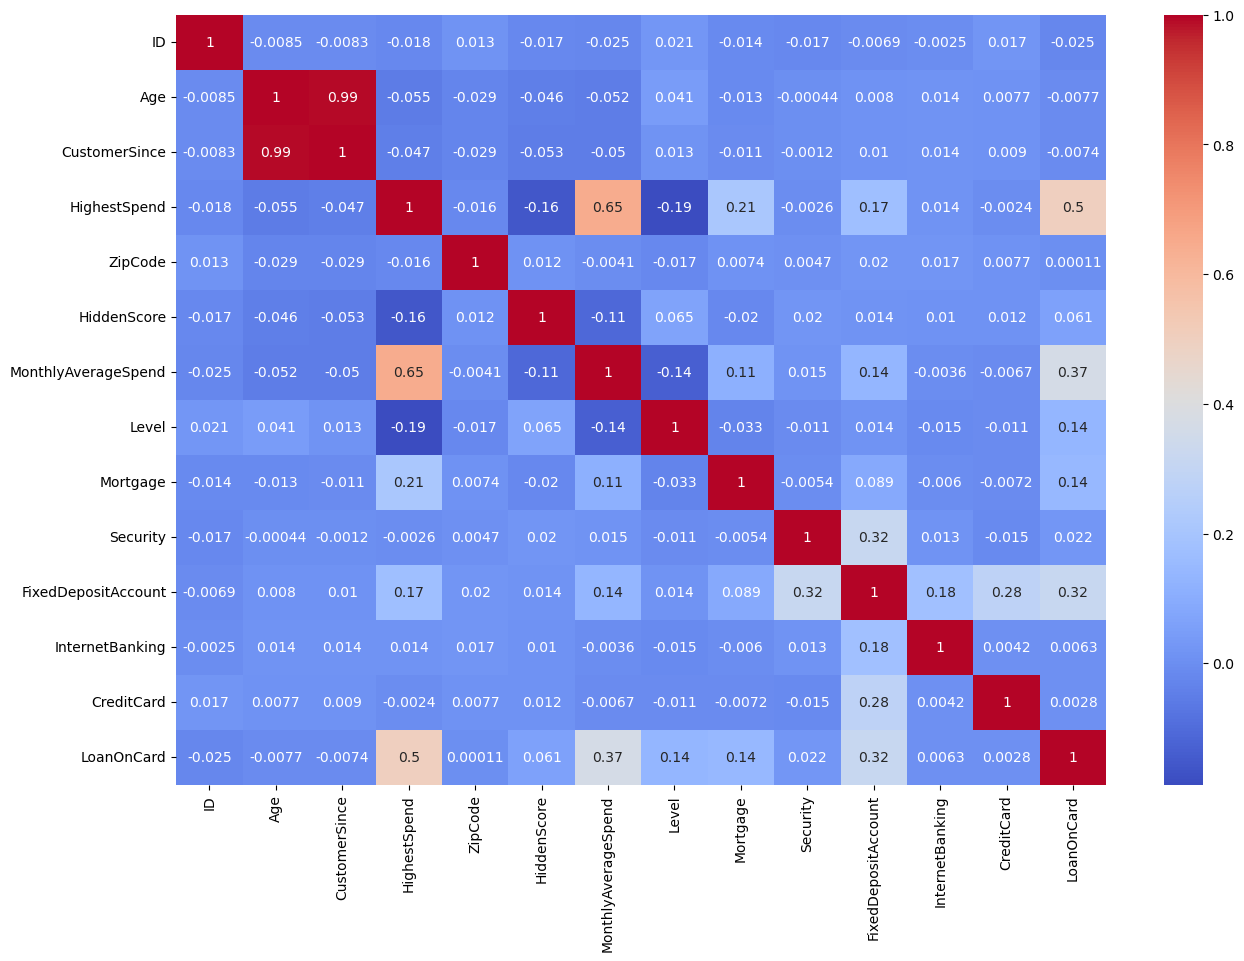

In [30]:
# Convert all columns in 'merged_df' to numeric, coercing errors
for feature in merged_df:
    merged_df[feature] = pd.to_numeric(merged_df[feature], errors='coerce')

plt.figure(figsize=(15,10))
# Create a new figure for the correlation heatmap 
sns.heatmap(merged_df.corr(), annot=True, cmap="coolwarm")# Create a heatmap of the correlation matrix with annotations and a 'coolwarm' color map

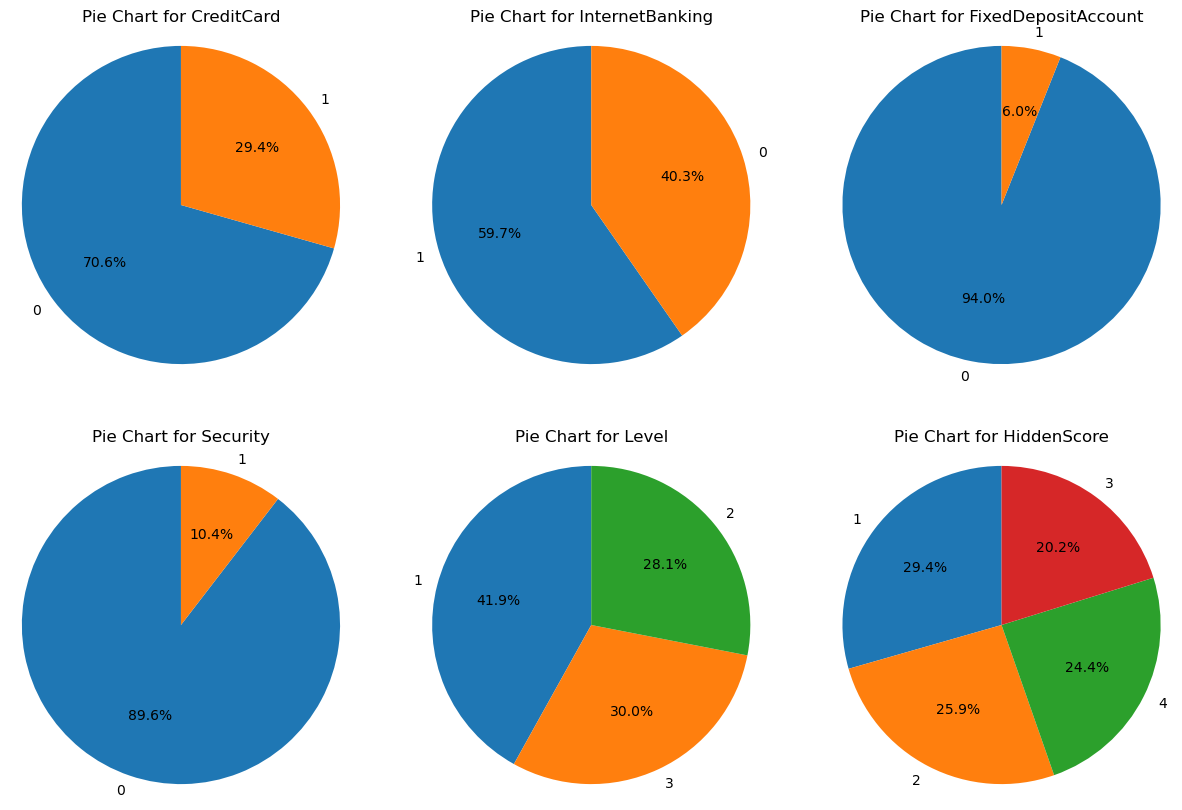

In [31]:
# Create a pie chart with percentages, starting angle, and labels
features=['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']
plt.figure(figsize=(15,10))
i=1
for feature in features:
    feature_counts = merged_df[feature].value_counts()

    plt.subplot(2,3,i)
    plt.pie(feature_counts, labels=feature_counts.index, autopct='%1.1f%%', startangle=90)
    plt.title(f'Pie Chart for {feature}')
    plt.axis('equal')
    
    i+=1